In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot


In [27]:

# Sample time series data
data = pd.Series(np.sin(np.linspace(0, 10, 100)) + np.random.normal(scale=0.1, size=100))

In [29]:
# Create features and labels
def create_features_labels(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size])
    return np.array(X), np.array(y)

window_size = 5
X, y = create_features_labels(data, window_size)

In [31]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [33]:
# Train a model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predict
predictions = model.predict(X_test)

In [37]:
predictions

array([ 1.03967895,  0.82831423,  0.84004122,  0.88342802,  0.87532195,
        0.8539583 ,  0.6439272 ,  0.57736421,  0.32516519,  0.38138543,
        0.29020762,  0.05629181,  0.13436228, -0.04009295, -0.16592245,
       -0.02281167, -0.29978201, -0.36078498, -0.44747574])

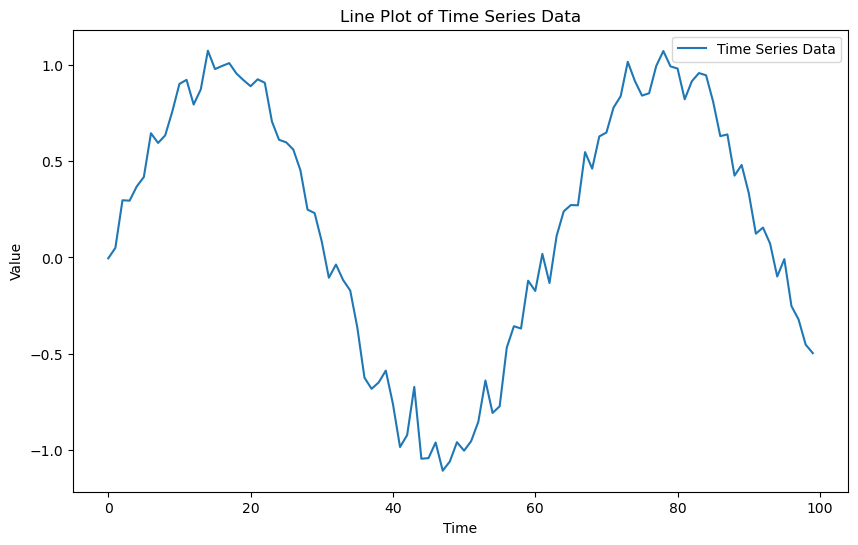

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(data, label='Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Line Plot of Time Series Data')
plt.legend()
plt.show()


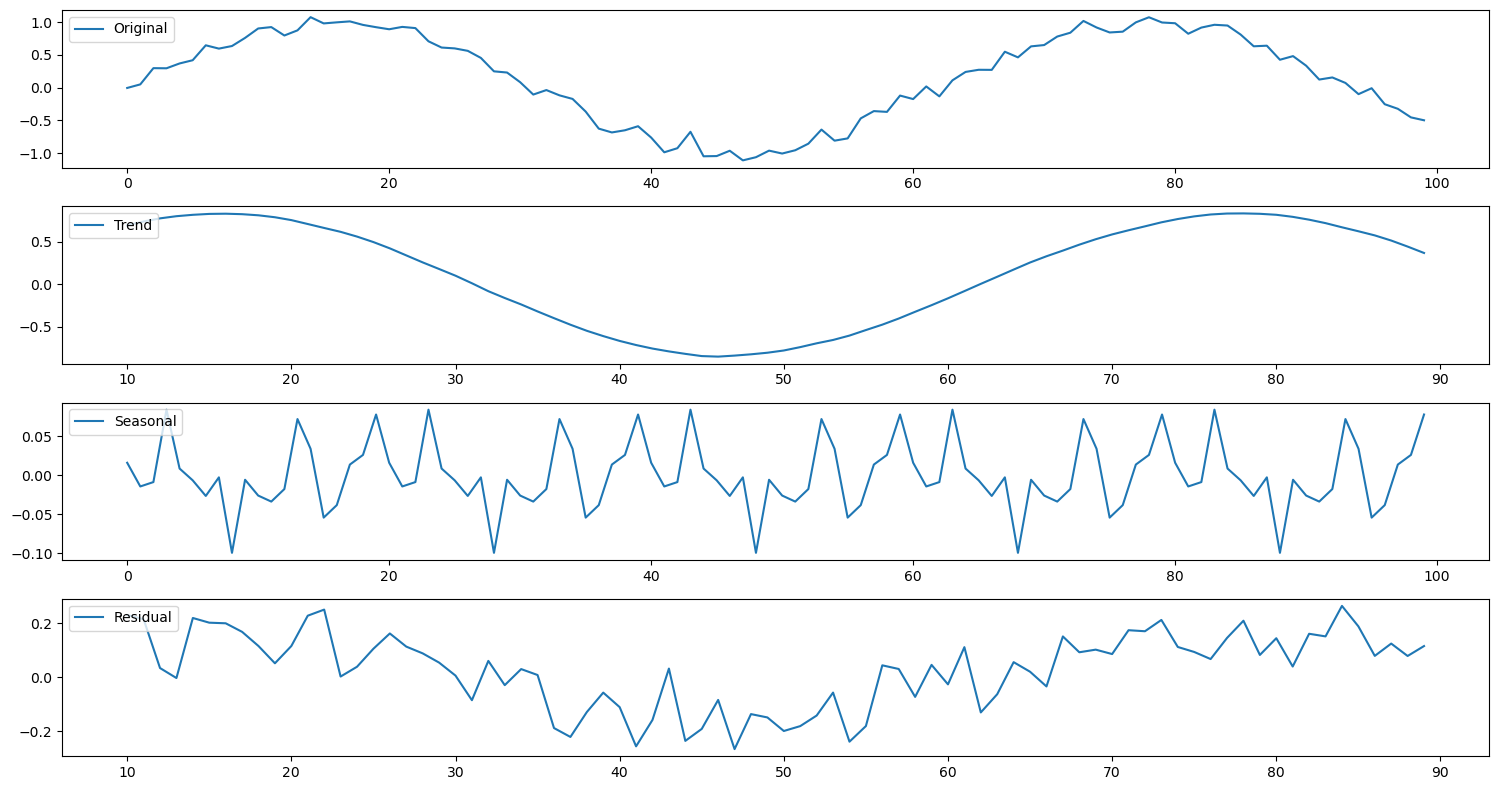

In [43]:
# Decompose the time series
decomposition = seasonal_decompose(data, period=20)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(15, 8))

plt.subplot(4, 1, 1)
plt.plot(data, label='Original')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


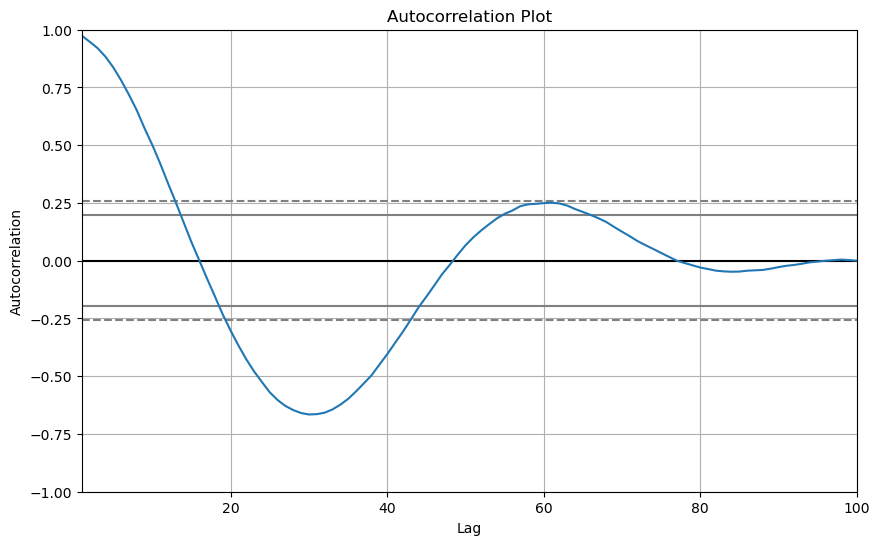

In [47]:
plt.figure(figsize=(10, 6))
autocorrelation_plot(data)
plt.title('Autocorrelation Plot')
plt.show()


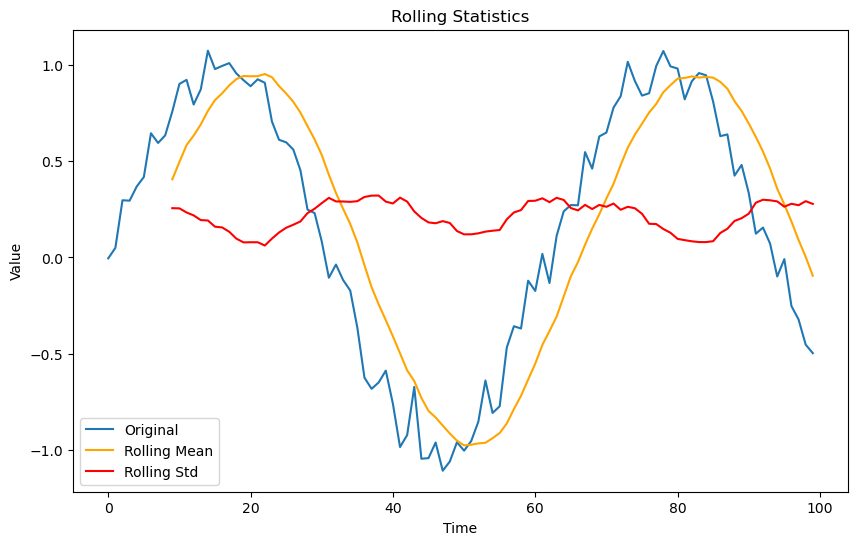

In [49]:
window_size = 10
rolling_mean = data.rolling(window=window_size).mean()
rolling_std = data.rolling(window=window_size).std()

plt.figure(figsize=(10, 6))
plt.plot(data, label='Original')
plt.plot(rolling_mean, label='Rolling Mean', color='orange')
plt.plot(rolling_std, label='Rolling Std', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Rolling Statistics')
plt.legend()
plt.show()


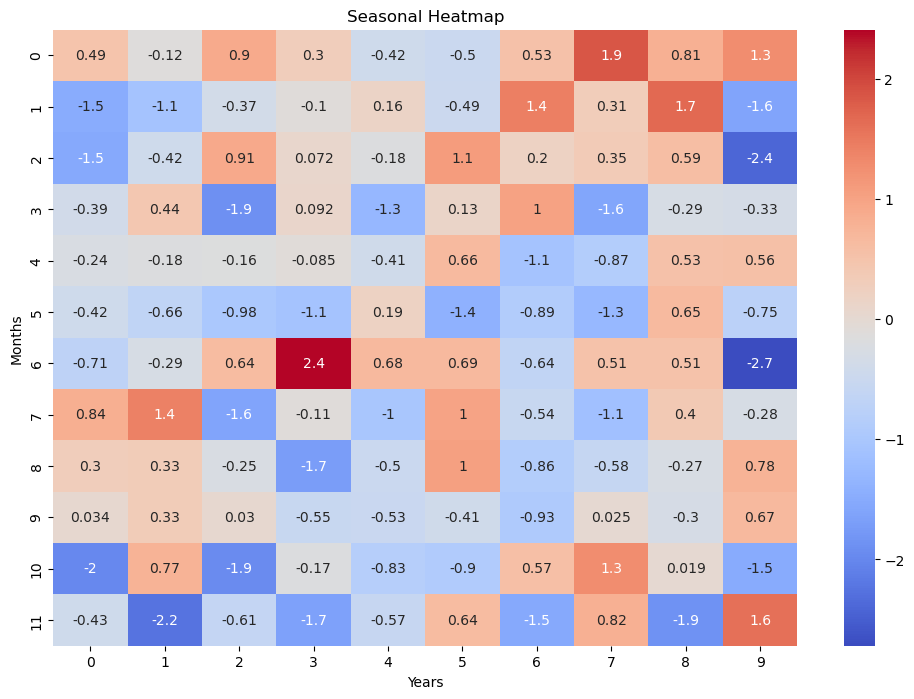

In [51]:
import seaborn as sns

# Reshape data for heatmap (e.g., monthly data across years)
# Here we'll generate some sample data for illustration
data_matrix = np.random.randn(12, 10)  # 12 months, 10 years
plt.figure(figsize=(12, 8))
sns.heatmap(data_matrix, cmap='coolwarm', annot=True)
plt.title('Seasonal Heatmap')
plt.xlabel('Years')
plt.ylabel('Months')
plt.show()
